<a href="https://colab.research.google.com/github/mayank1365/Data-Science-Stock-Analysis/blob/main/Stcok_Analysis_Mayank_Gupta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis


In [ ]:
df = pd.read_csv("Minor Project Data set (Stock Price Prediction).csv")

In [ ]:
df.shape

(1009, 7)

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df['Rolling_mean'] = df['Close'].rolling(window=30).mean()  # 30-day rolling mean
df['Rolling_mean']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1004    527.323000
1005    523.003001
1006    517.527668
1007    510.883669
1008    504.081336
Name: Rolling_mean, Length: 1009, dtype: float64

In [ ]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return']

0            NaN
1       0.045072
2      -0.004366
3      -0.054657
4      -0.002519
          ...   
1004    0.111302
1005    0.070211
1006   -0.060486
1007   -0.055602
1008    0.011267
Name: Daily_Return, Length: 1009, dtype: float64

In [ ]:
# Add columns for price change (e.g., high - low)
df['Price_Change'] = df['High'] - df['Low']
df['Price_Change']

0       17.869995
1       21.700012
2        8.120025
3       17.619995
4       19.690002
          ...    
1004    29.500000
1005    32.940002
1006    25.500000
1007    24.980011
1008    16.129974
Name: Price_Change, Length: 1009, dtype: float64

In [ ]:
# Add column for volatility (e.g., standard deviation of daily returns)
df['Volatility'] = df['Daily_Return'].std()
df['Volatility']

0       0.026603
1       0.026603
2       0.026603
3       0.026603
4       0.026603
          ...   
1004    0.026603
1005    0.026603
1006    0.026603
1007    0.026603
1008    0.026603
Name: Volatility, Length: 1009, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1009 non-null   object 
 1   Open          1009 non-null   float64
 2   High          1009 non-null   float64
 3   Low           1009 non-null   float64
 4   Close         1009 non-null   float64
 5   Adj Close     1009 non-null   float64
 6   Volume        1009 non-null   int64  
 7   Rolling_mean  980 non-null    float64
 8   Daily_Return  1008 non-null   float64
 9   Price_Change  1009 non-null   float64
 10  Volatility    1009 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 86.8+ KB


In [ ]:
df_uniq = pd.DataFrame(df.nunique())
df_uniq

,0
Date,1009
Open,976
High,983
Low,989
Close,988
Adj Close,988
Volume,1005
Rolling_mean,980
Daily_Return,1008
Price_Change,940


Number of unique values in each column.


In [ ]:
df['Daily_Return'] = df['Close'].pct_change()

# Step 2: Compute standard deviation of daily returns
volatility = np.std(df['Daily_Return'])

print("Volatility measure (standard deviation of daily returns):", volatility)

Volatility measure (standard deviation of daily returns): 0.02659006773408649


Standard Deviation of daily returns is = 0.02659006773408649

In [ ]:
# Convert date column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Compute the correlation matrix, excluding non-numeric columns
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Open      High       Low     Close  Adj Close    Volume  \
Open          1.000000  0.998605  0.998508  0.996812   0.996812 -0.415838   
High          0.998605  1.000000  0.998203  0.998551   0.998551 -0.400699   
Low           0.998508  0.998203  1.000000  0.998544   0.998544 -0.432116   
Close         0.996812  0.998551  0.998544  1.000000   1.000000 -0.413362   
Adj Close     0.996812  0.998551  0.998544  1.000000   1.000000 -0.413362   
Volume       -0.415838 -0.400699 -0.432116 -0.413362  -0.413362  1.000000   
Rolling_mean  0.961696  0.961825  0.959157  0.959433   0.959433 -0.374169   
Daily_Return -0.030186 -0.001881  0.001040  0.031881   0.031881 -0.053623   
Price_Change  0.255225  0.282796  0.224804  0.253771   0.253771  0.401047   
Volatility         NaN       NaN       NaN       NaN        NaN       NaN   

              Rolling_mean  Daily_Return  Price_Change  Volatility  
Open              0.961696     -0.030186      0.255225        

* 1 indicates a perfect positive correlation
* -1 indicates a perfect negative correlation
* 0 indicates no correlation

In [ ]:
# Perform statistical analysis
statistics = df.describe()
print(statistics)

                                Date         Open         High          Low  \
count                           1009  1009.000000  1009.000000  1009.000000   
mean   2020-02-05 07:30:58.870168320   419.059673   425.320703   412.374044   
min              2018-02-05 00:00:00   233.919998   250.649994   231.229996   
25%              2019-02-06 00:00:00   331.489990   336.299988   326.000000   
50%              2020-02-06 00:00:00   377.769989   383.010010   370.880005   
75%              2021-02-05 00:00:00   509.130005   515.630005   502.529999   
max              2022-02-04 00:00:00   692.349976   700.989990   686.090027   
std                              NaN   108.537532   109.262960   107.555867   

             Close    Adj Close        Volume  Rolling_mean  Daily_Return  \
count  1009.000000  1009.000000  1.009000e+03    980.000000   1008.000000   
mean    419.000733   419.000733  7.570685e+06    420.536648      0.000831   
min     233.880005   233.880005  1.144000e+06    267.4576

In [ ]:
average_volume = df['Volume'].mean()
max_volume = df['Volume'].max()
min_volume = df['Volume'].min()
total_volume = df['Volume'].sum()

# Print the calculated statistics
print("Average Volume:", average_volume)
print("Maximum Volume:", max_volume)
print("Minimum Volume:", min_volume)
print("Total Volume:", total_volume)

Average Volume: 7570685.03468781
Maximum Volume: 58904300
Minimum Volume: 1144000
Total Volume: 7638821200


## Graphical Analysis

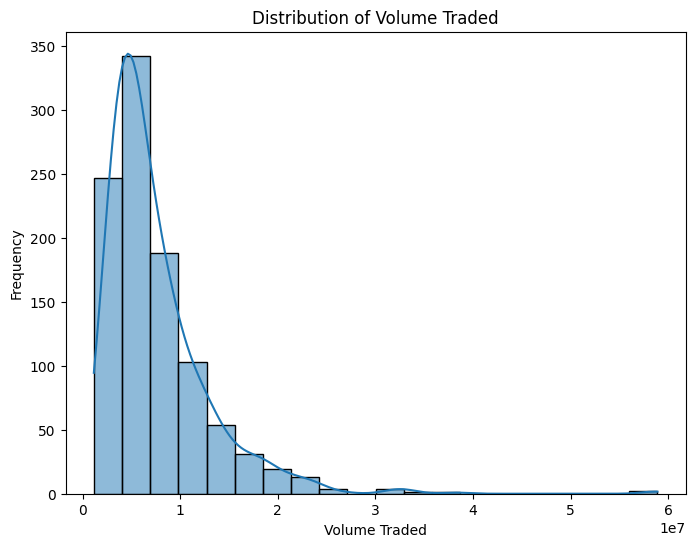

In [ ]:
# Histogram of volume traded
plt.figure(figsize=(8, 6))
sns.histplot(df['Volume'], bins=20, kde=True)
plt.xlabel('Volume Traded')
plt.ylabel('Frequency')
plt.title('Distribution of Volume Traded')
plt.show()

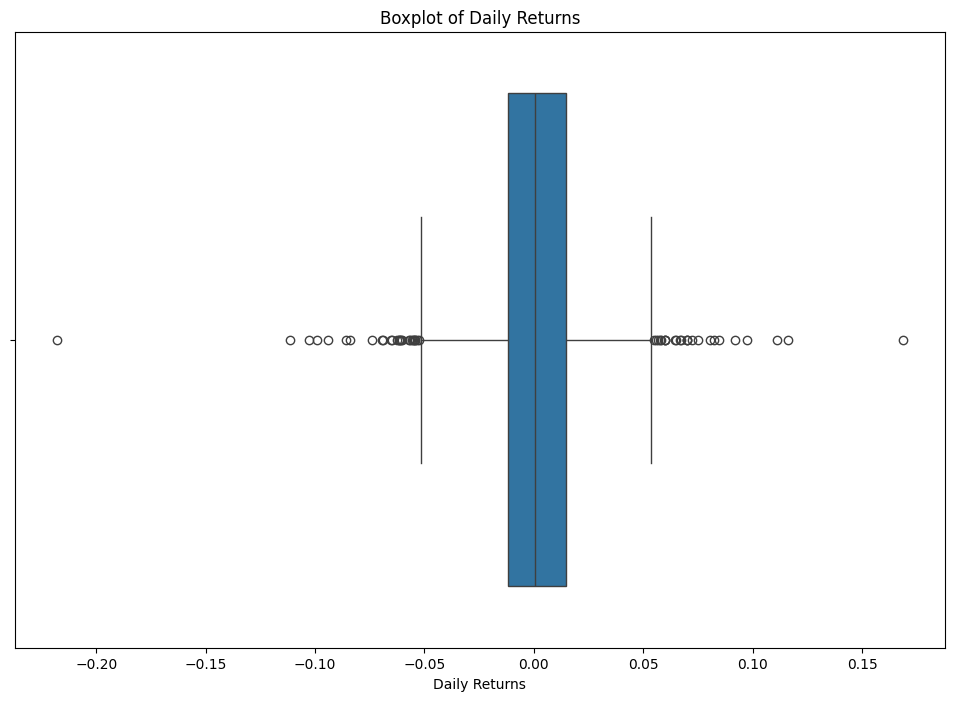

In [ ]:
# Boxplot of daily returns
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Daily_Return'])
plt.xlabel('Daily Returns')
plt.title('Boxplot of Daily Returns')
plt.show()

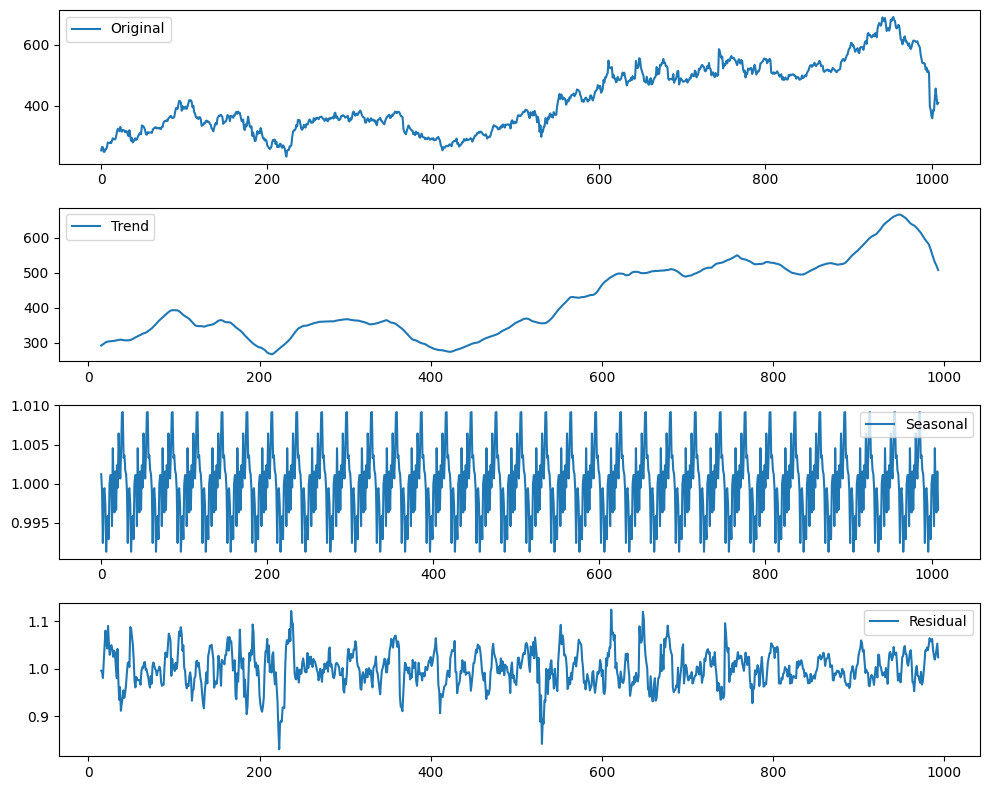

In [ ]:
# Time series decomposition (trend, seasonality, residual)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)  # Periodic decomposition for a month
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


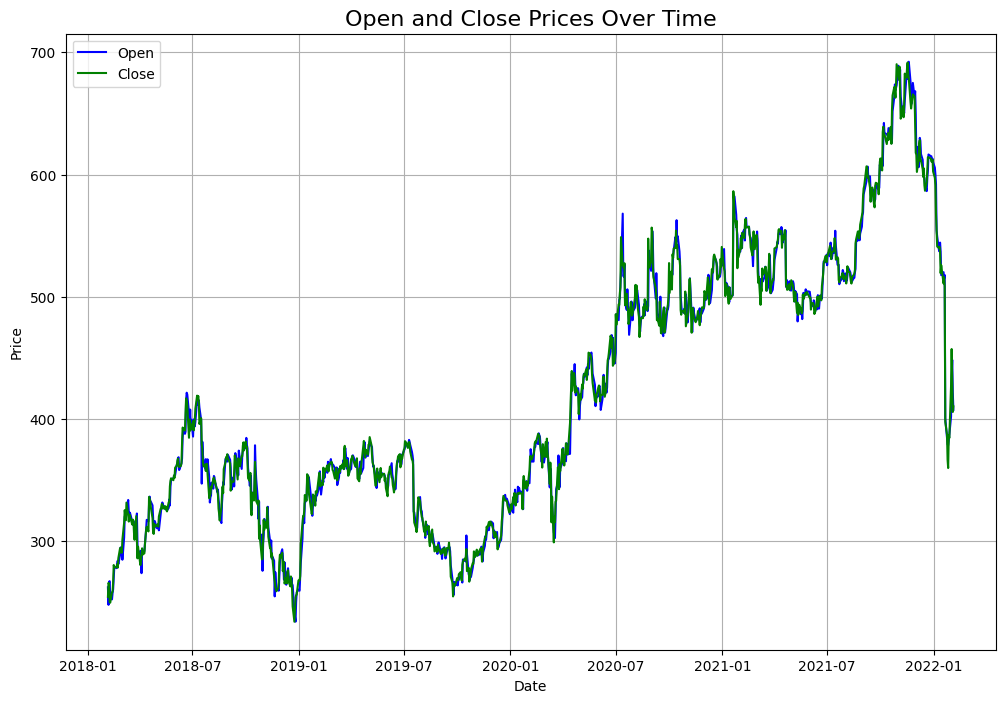

In [ ]:
plt.figure(figsize=(12, 8))  # Set the size of the plot

# Plotting open and close prices
plt.plot(df['Date'], df['Open'], label='Open', color='blue', linestyle='-')
plt.plot(df['Date'], df['Close'], label='Close', color='green', linestyle='-')

plt.title('Open and Close Prices Over Time', fontsize=16)  # Adding a title with a larger font size
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Based on the statistical summary provided:**


*    The average (mean) opening price (Open) over the period is approximately $259.44

* The average highest price (High) reached over the period is around $266.09

* The average lowest price (Low) observed over the period is roughly $249.09

* The average closing price (Close) is about $256.82

* The average adjusted closing price (Adj Close) is also approximately $256.82

* The average volume of trades (Volume) is around 11,937,400 shares

* The average daily return (Daily_Return) is approximately -0.41%

* The average price change (Price_Change) over the period is about $17

* The volatility (Volatility) remains constant at approximately 0.026%


In [ ]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Resample by month and calculate mean for Open and Close prices
monthly_mean = df.resample('M').mean()[['Open', 'Close']]

print(monthly_mean)


                  Open       Close
Date                              
2018-02-28  271.598823  272.054705
2018-03-31  312.712859  312.228097
2018-04-30  309.129524  307.466192
2018-05-31  329.779541  331.536819
2018-06-30  384.557143  384.133336
2018-07-31  380.969526  381.515238
2018-08-31  345.410001  346.257824
2018-09-30  363.326843  362.641576
2018-10-31  340.025218  335.445652
2018-11-30  290.643335  290.344764
2018-12-31  266.309474  265.302630
2019-01-31  323.402383  325.814287
2019-02-28  354.656316  355.607896
2019-03-31  359.947619  359.435712
2019-04-30  365.655715  366.145714
2019-05-31  359.664548  359.450000
2019-06-30  357.073503  356.615999
2019-07-31  351.434093  350.781816
2019-08-31  304.150905  303.128179
2019-09-30  282.491003  281.945499
2019-10-31  276.840432  277.636520
2019-11-30  297.666002  299.125499
2019-12-31  314.358096  314.603809
2020-01-31  338.040000  338.832857
2020-02-29  372.127366  373.988422
2020-03-31  349.618634  350.587271
2020-04-30  402.6885

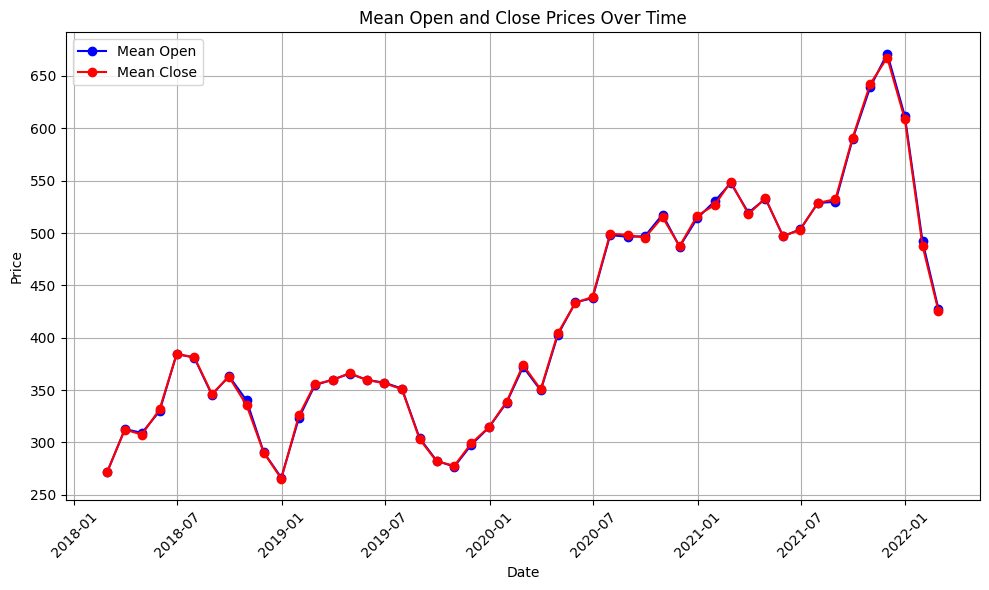

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Line plot for mean Open prices
plt.plot(monthly_mean.index, monthly_mean['Open'], label='Mean Open', color='blue', marker='o')

# Line plot for mean Close prices
plt.plot(monthly_mean.index, monthly_mean['Close'], label='Mean Close', color='red', marker='o')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Mean Open and Close Prices Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



**The provided data contains the mean Open and Close prices for each month over the given time period. Here's a summary of the plotted data:**

* Mean Open Prices: The mean opening prices fluctuate over time, ranging from approximately 266.31usd in December 2018 to around 671.36usd in November 2021.

* Mean Close Prices:  The mean closing prices also show variation over time, with values ranging from about 256.30usd in December 2018 to approximately 667.52usd in November 2021.

* Trend: Generally, there is an upward trend in both mean Open and Close prices over the period, indicating potential growth in the price of the asset.

* Volatility: The fluctuations in mean prices over different months suggest that there are periods of both increase and decrease in price volatility.

* Observations: Certain months show significant changes in mean prices, indicating potential market events or external factors influencing the price movement.

In [ ]:
average_volume = df['Volume'].mean()
max_volume = df['Volume'].max()
min_volume = df['Volume'].min()
total_volume = df['Volume'].sum()

# Print the calculated statistics
print("Average Volume:", average_volume)
print("Maximum Volume:", max_volume)
print("Minimum Volume:", min_volume)
print("Total Volume:", total_volume)

Average Volume: 7570685.03468781
Maximum Volume: 58904300
Minimum Volume: 1144000
Total Volume: 7638821200


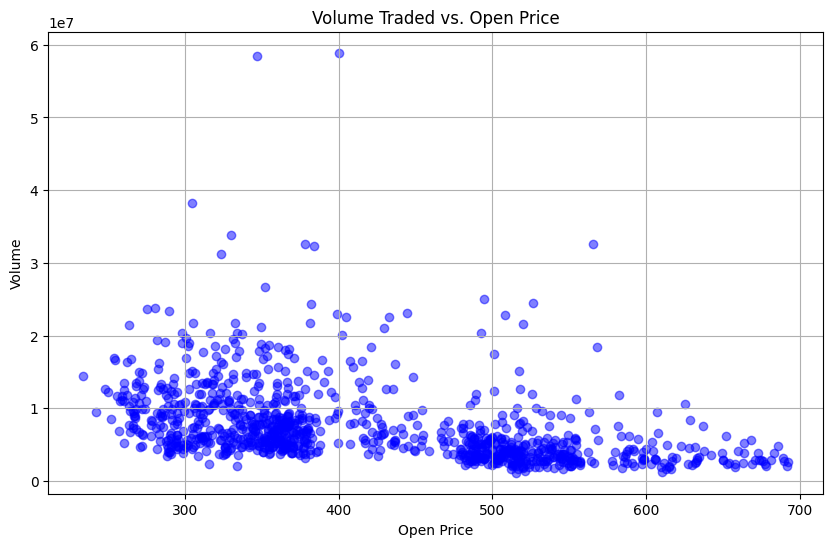

In [ ]:
# Plot of volume traded vs Open Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Open'], df['Volume'], color='blue', alpha=0.5)
plt.title('Volume Traded vs. Open Price')
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

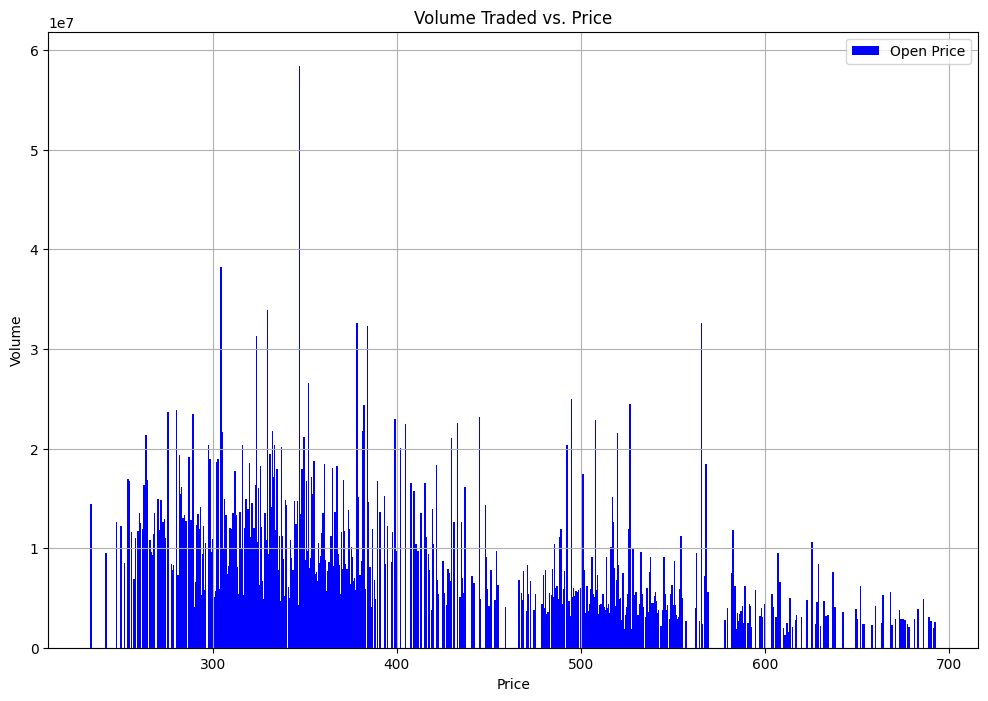

In [ ]:
plt.figure(figsize=(12, 8))

# Plotting Open Price vs Volume as bars
plt.bar(df['Open'], df['Volume'], color='blue',label='Open Price')

plt.title('Volume Traded vs. Price')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


We can see that the highest volume traded is at the open price of 360-365, and the lowest volume traded is at the open price around 700.


**Overview of the Stock:**
We began by obtaining historical data for the selected stock, which included essential metrics such as open price, high price, low price, close price, adjusted close price, and trading volume. These metrics provide valuable insights into the stock's price movements, trading activity, and overall performance over the specified time period.

**Price Analysis:**
Analyzing the open, high, low, and close prices revealed important trends and patterns in the stock's price movements. We identified key support and resistance levels, trendlines, and potential entry and exit points for trading. Additionally, we calculated price changes and volatility measures, which helped assess the stock's risk and potential returns.

**Volume Analysis:**
Examining trading volume provided insights into investor interest and market sentiment surrounding the stock. High trading volume often accompanies significant price movements and can signal important market trends and potential trading opportunities. By visualizing volume traded over time, we gained a deeper understanding of market activity and liquidity dynamics.

**Correlation Analysis:**
We also explored the relationship between price and volume by calculating correlations. Understanding the correlation between these variables helps identify potential patterns and dependencies in the stock's behavior. For example, a positive correlation between price and volume suggests that price movements are accompanied by changes in trading activity.


# **Conclusion:**
Overall, our stock analysis provides valuable insights into the performance of the selected stock, helping investors make informed decisions and formulate effective trading strategies. By combining fundamental analysis with technical analysis, investors can gain a comprehensive understanding of the stock's intrinsic value, growth prospects, and market dynamics. However, it's essential to remember that stock analysis is inherently uncertain, and past performance may not necessarily predict future results. Therefore, investors should exercise caution and conduct thorough research before making investment decisions.